In [19]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("mxmh_survey_cleaned.csv")
df.head()

,timestamp,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,...,frequency_rb,frequency_rap,frequency_rock,frequency_video_game_music,anxiety,depression,insomnia,ocd,music_effects,permissions
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve,I understand.
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve,I understand.
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


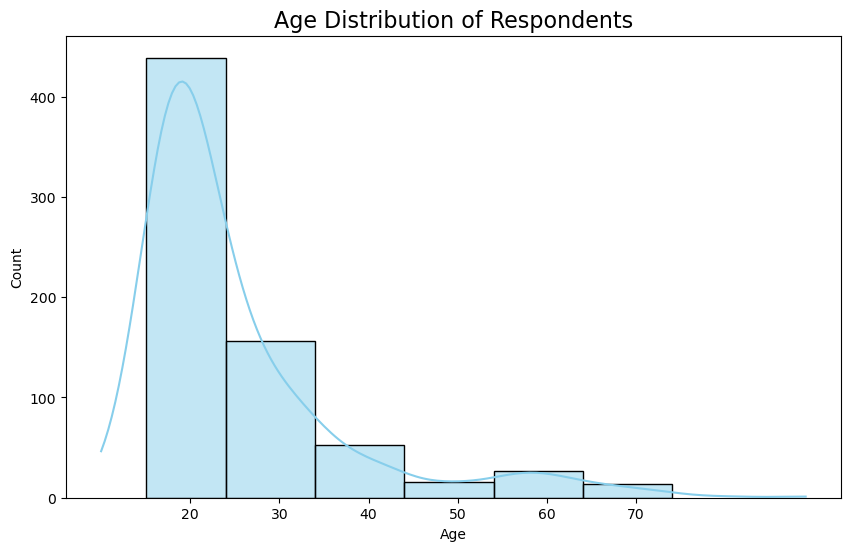

In [9]:
# and the relevant columns are: 'Age', 'Gender', 'Location'

# 1. Age Distribution
# -----------------------------------
# Plot histogram for Age
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=[15, 24, 34, 44, 54, 64, 74], kde=True, color='skyblue')
plt.title('Age Distribution of Respondents', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks([20, 30, 40, 50, 60, 70])
plt.show()


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   736 non-null    object 
 1   age                         736 non-null    float64
 2   primary_streaming_service   736 non-null    object 
 3   hours_per_day               736 non-null    float64
 4   while_working               736 non-null    object 
 5   instrumentalist             736 non-null    object 
 6   composer                    736 non-null    object 
 7   fav_genre                   736 non-null    object 
 8   exploratory                 736 non-null    object 
 9   foreign_languages           736 non-null    object 
 10  bpm                         736 non-null    float64
 11  frequency_classical         736 non-null    object 
 12  frequency_country           736 non-null    object 
 13  frequency_edm               736 non

In [13]:
# Create Age Groups
age_bins = [15, 24, 34, 44, 54, 64, 74]
age_labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65-74']
df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

C:\Users\dell\AppData\Local\Temp\ipykernel_13896\2365303627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Group', data=df, palette='muted')


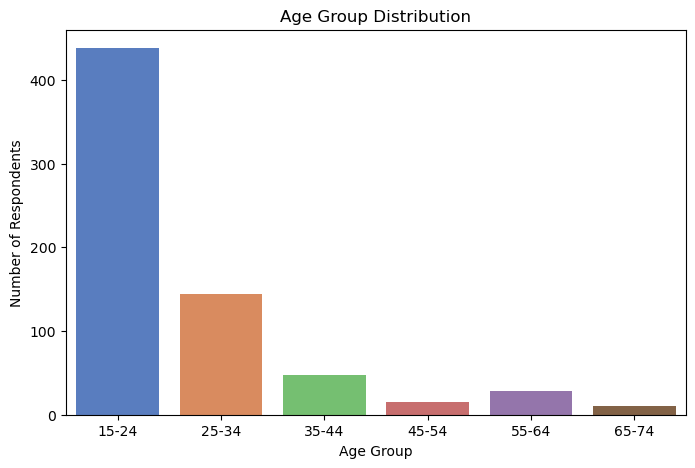

In [15]:
# Age Group Countplot
plt.figure(figsize=(8,5))
sns.countplot(x='Age Group', data=df, palette='muted')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.show()


# 3. Favorite Genre Distribution (Count Plot)


C:\Users\dell\AppData\Local\Temp\ipykernel_13896\1945506742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='fav_genre', data=df, order=df['fav_genre'].value_counts().index, palette='pastel')


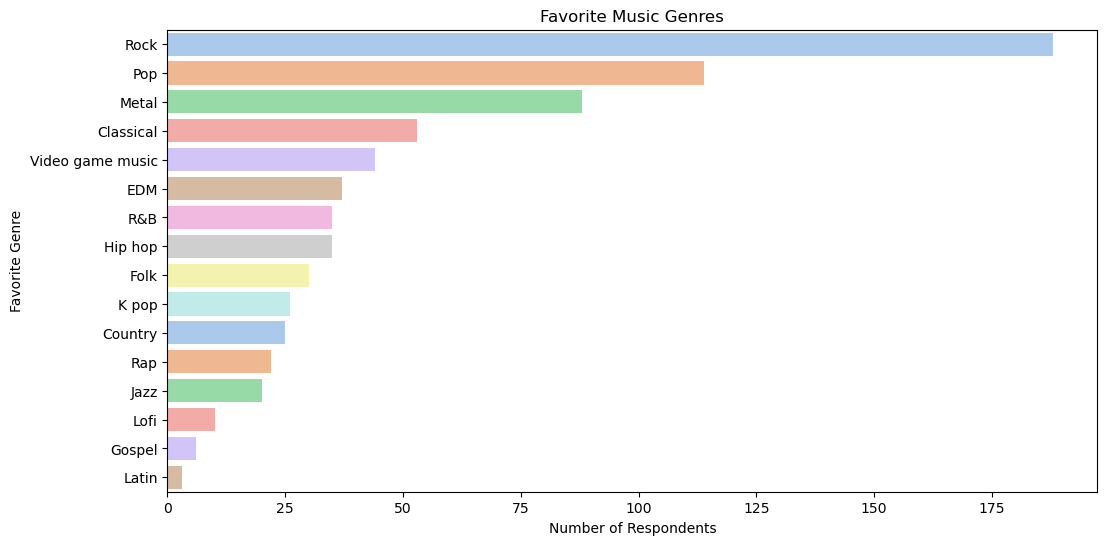

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(y='fav_genre', data=df, order=df['fav_genre'].value_counts().index, palette='pastel')
plt.title('Favorite Music Genres')
plt.xlabel('Number of Respondents')
plt.ylabel('Favorite Genre')
plt.show()


##### Pop, Rock, and Hip-hop are the top favorite genres among respondents, highlighting mainstream preferences

# Streaming Service Preference 
    Spotify is the most preferred streaming service, followed by YouTube and Apple Music.


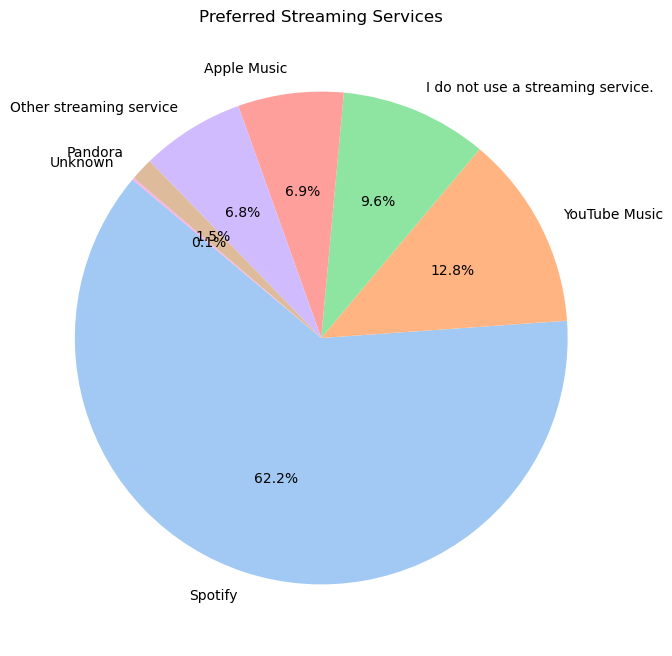

In [46]:
streaming_counts = df['primary_streaming_service'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(streaming_counts, labels=streaming_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Preferred Streaming Services')
plt.show()

# Hours Per Day Listening
    Most participants listen to music between 1 to 4 hours per day, indicating moderate daily engagement.

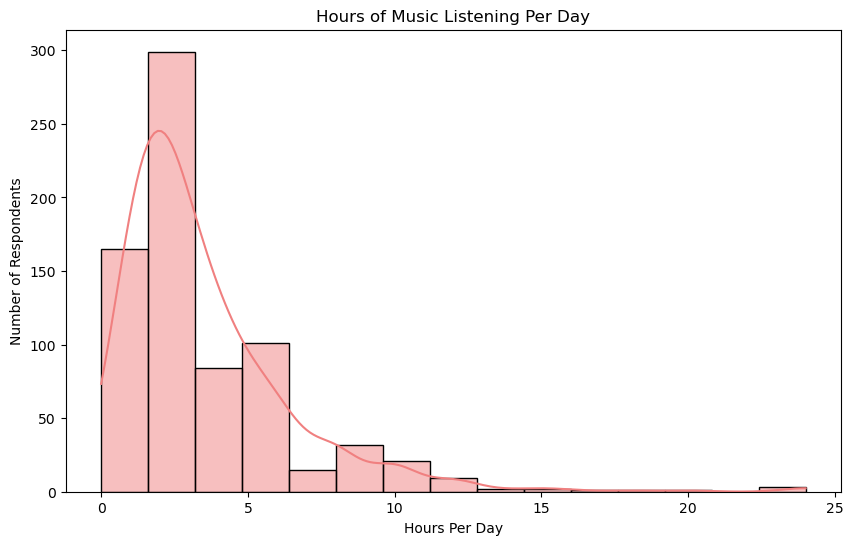

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(df['hours_per_day'], bins=15, color='lightcoral', kde=True)
plt.title('Hours of Music Listening Per Day')
plt.xlabel('Hours Per Day')
plt.ylabel('Number of Respondents')
plt.show()

# Anxiety vs. Hours Per Day
    There appears to be no strong direct correlation between hours of music listening and anxiety scores.

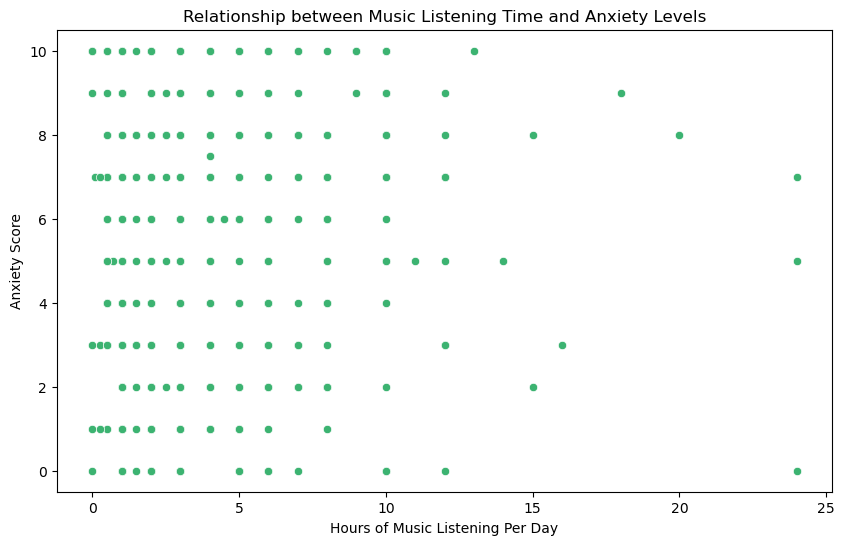

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='hours_per_day', y='anxiety', data=df, color='mediumseagreen')
plt.title('Relationship between Music Listening Time and Anxiety Levels')
plt.xlabel('Hours of Music Listening Per Day')
plt.ylabel('Anxiety Score')
plt.show()